In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

path='drive/MyDrive//MUIA/TFM/Code/TDA_Stocks_Spain-main/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
#reads the csv
stocks_spain = pd.read_excel(f'{path}data/stocks_spain.xlsx')
stocks_spain.drop(columns=stocks_spain.columns[0], axis=1, inplace=True)
stocks_spain

,Date,A3M,AMS,ALB,APPS,ACS,AENA,ALM,BKT,BBVA,...,SAB,SLR,SAN,SCYR,TEF,TL5,TLGO,UNI,VID,VIS
0,2018-01-02,8.710,60.220001,48.349998,11.220,32.255001,170.500000,8.348511,7.953,7.082,...,1.655001,1.660000,5.226751,2.500,8.191,9.400,4.397,1.2900,66.521370,54.700001
1,2018-01-03,8.665,60.500000,49.299999,11.230,32.470001,172.399994,8.539362,7.964,7.094,...,1.676181,1.920000,5.227709,2.459,8.166,9.432,4.430,1.3100,66.286316,55.000000
2,2018-01-04,8.770,61.820000,49.750000,11.430,33.490002,175.399994,8.612767,8.082,7.221,...,1.717063,1.960000,5.403084,2.553,8.295,9.574,4.470,1.3200,66.286316,55.599998
3,2018-01-05,8.865,63.500000,50.299999,11.570,33.939999,177.350006,8.563830,8.140,7.253,...,1.738736,2.040000,5.438543,2.572,8.358,9.830,4.450,1.3150,66.599724,56.500000
4,2018-01-08,8.750,62.959999,49.700001,11.540,33.650002,178.250000,8.632341,8.124,7.235,...,1.729870,2.270000,5.454834,2.600,8.370,9.570,4.405,1.3070,66.443016,56.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,2023-03-14,3.466,60.459999,44.849998,7.580,28.709999,153.199997,8.735000,6.098,6.690,...,1.139000,17.540001,3.445500,2.928,3.811,3.098,3.190,1.0890,95.699997,65.599998
1332,2023-03-15,3.380,58.160000,44.450001,7.310,28.030001,145.949997,8.670000,5.704,6.048,...,1.019500,16.830000,3.208000,2.828,3.753,3.052,3.065,1.0230,94.000000,66.199997
1333,2023-03-16,3.380,59.400002,44.799999,7.410,28.469999,148.449997,8.815000,5.560,6.254,...,1.014500,17.040001,3.291500,2.852,3.722,3.062,3.075,1.0050,95.099998,66.800003
1334,2023-03-17,3.346,58.320000,45.299999,7.280,28.160000,142.399994,8.735000,5.420,6.036,...,0.982600,16.885000,3.138500,2.792,3.702,3.022,3.025,0.9875,94.199997,66.550003


Seleccionar una fecha sobre la que hacer análisis (borraremos los datos posteriores a esa fecha)

In [25]:
def DateFilter (time, finish_date_str, show=False):
    # convert date column to datetime format
    stocks_spain['Date'] = pd.to_datetime(stocks_spain['Date'])
    
    if type(finish_date_str) == str:
        finish_date = datetime.strptime(finish_date_str, '%Y-%m-%d')
    else:
        finish_date = finish_date_str
    
    start_date = finish_date - timedelta(days=time)
    # filter the dataframe to keep rows before and after the filter date 
    stocks_filter = stocks_spain[(stocks_spain['Date'] <= finish_date) & (stocks_spain['Date'] >= start_date)]

    # print the resulting dataframe
    if show==True:
        print(f'Start date: {start_date}')
        print(f'Finish date: {finish_date}')
        
    return stocks_filter, start_date, finish_date

In [26]:
#Crahs inicio covid: '2020-02-09'
# Fechas analisis trabajo: '2020-03-24' '2020-11-16'
time = 100
stocks_filter, start_date, finish_date = DateFilter (time=time, finish_date_str = '2020-03-24')
print(stocks_filter)

          Date    A3M        AMS        ALB    APPS        ACS        AENA  \
499 2019-12-16  3.760  72.779999  48.349998  11.320  35.709999  174.500000   
500 2019-12-17  3.760  73.139999  48.250000  11.310  35.610001  175.000000   
501 2019-12-18  3.620  72.860001  48.250000  11.330  34.869999  174.399994   
502 2019-12-19  3.524  72.480003  48.700001  11.320  34.790001  171.250000   
503 2019-12-20  3.554  72.199997  48.349998  11.390  34.590000  172.100006   
..         ...    ...        ...        ...     ...        ...         ...   
564 2020-03-18  2.792  39.139999  33.500000   4.670  11.625000  106.250000   
565 2020-03-19  2.852  43.029999  34.000000   4.176  11.445000  105.300003   
566 2020-03-20  2.830  40.759998  32.250000   4.328  13.375000  126.000000   
567 2020-03-23  2.690  40.000000  30.850000   4.266  13.655000  102.150002   
568 2020-03-24  2.738  41.840000  32.000000   5.350  14.500000  106.699997   

           ALM    BKT    BBVA  ...       SAB    SLR       SAN  

In [27]:
# Calculate returns
logreturn = np.log(stocks_filter.iloc[:,1:]).diff()
logreturn = logreturn.iloc[1: , :]
logreturn

,A3M,AMS,ALB,APPS,ACS,AENA,ALM,BKT,BBVA,ACX,...,SAB,SLR,SAN,SCYR,TEF,TL5,TLGO,UNI,VID,VIS
500,0.000000,0.004934,-0.002070,-0.000884,-0.002804,0.002861,0.008853,-0.007482,-0.003362,-0.011329,...,-0.009233,0.018540,-0.008726,-0.011317,-0.034148,-0.017781,-0.011677,-0.010471,0.007722,-0.003704
501,-0.037945,-0.003836,0.000000,0.001767,-0.021000,-0.003434,-0.016405,-0.002105,0.009268,0.015545,...,0.007854,-0.017044,0.008199,-0.007616,-0.006364,-0.004675,-0.008425,0.007341,-0.001100,0.003704
502,-0.026877,-0.005229,0.009283,-0.000883,-0.002297,-0.018227,-0.003452,0.005404,0.011513,0.009073,...,0.015525,0.018512,-0.000132,-0.001530,-0.015471,-0.005060,0.015114,-0.013148,-0.011062,0.006552
503,0.008477,-0.003871,-0.007213,0.006165,-0.005765,0.004951,0.013736,0.013678,-0.002331,-0.008473,...,-0.005145,-0.010325,0.006957,0.001530,0.008454,0.010452,-0.003339,-0.005840,0.031749,0.014989
504,-0.000563,0.007726,0.000000,-0.014147,0.006053,0.007237,0.013550,-0.037615,-0.010164,-0.001002,...,-0.032898,-0.003713,-0.015157,0.017431,-0.012166,0.002149,0.014938,-0.003200,-0.011924,-0.017441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.037961,-0.105846,-0.032308,-0.196672,-0.158748,0.075332,0.040259,-0.084078,-0.040342,-0.052922,...,-0.109932,0.004630,-0.064079,-0.068934,0.002073,-0.048621,0.078224,-0.069472,-0.050010,0.029270
565,0.021262,0.094753,0.014815,-0.111805,-0.015605,-0.008981,0.032964,0.117345,0.034474,0.005758,...,0.006357,0.035543,0.001469,-0.002647,0.068141,0.014485,-0.063891,-0.065978,-0.025976,-0.066797
566,-0.007744,-0.054196,-0.052842,0.035752,0.155834,0.179468,0.029884,0.044845,0.029003,0.000338,...,-0.017997,-0.021781,0.031795,-0.009765,-0.057841,-0.018050,-0.011711,-0.069405,-0.069463,-0.022454
567,-0.050735,-0.018822,-0.044381,-0.014429,0.020718,-0.209840,-0.033027,-0.046893,-0.035803,-0.001351,...,0.005243,-0.041075,0.002841,-0.017094,-0.039836,-0.049040,-0.005249,0.009020,-0.031521,-0.045599


In [28]:
#creates a correlation matrix
cor_matrix = logreturn.corr()

#shows the first 5 rows
cor_matrix.head()

,A3M,AMS,ALB,APPS,ACS,AENA,ALM,BKT,BBVA,ACX,...,SAB,SLR,SAN,SCYR,TEF,TL5,TLGO,UNI,VID,VIS
A3M,1.000000,0.588617,0.523605,0.108238,0.392250,0.524523,0.300728,0.425729,0.502982,0.574735,...,0.550714,0.656007,0.501697,0.594284,0.511881,0.706150,0.551959,0.525565,0.457969,0.419703
AMS,0.588617,1.000000,0.661016,0.351061,0.558257,0.331995,0.284299,0.641374,0.590595,0.711840,...,0.685897,0.641623,0.587327,0.687500,0.527164,0.676514,0.398184,0.648606,0.583157,0.267250
ALB,0.523605,0.661016,1.000000,0.373881,0.403644,0.398377,0.246793,0.575380,0.688644,0.635466,...,0.613826,0.757355,0.673008,0.697107,0.582243,0.744070,0.511324,0.590406,0.645289,0.441763
APPS,0.108238,0.351061,0.373881,1.000000,0.632725,0.230712,0.252315,0.403294,0.534485,0.543804,...,0.534409,0.415452,0.614250,0.508740,0.237688,0.493501,0.340457,0.418222,0.377675,0.144907
ACS,0.392250,0.558257,0.403644,0.632725,1.000000,0.525146,0.363023,0.704196,0.695662,0.691784,...,0.652677,0.522478,0.731854,0.756666,0.329274,0.609679,0.469598,0.574624,0.405297,0.114183


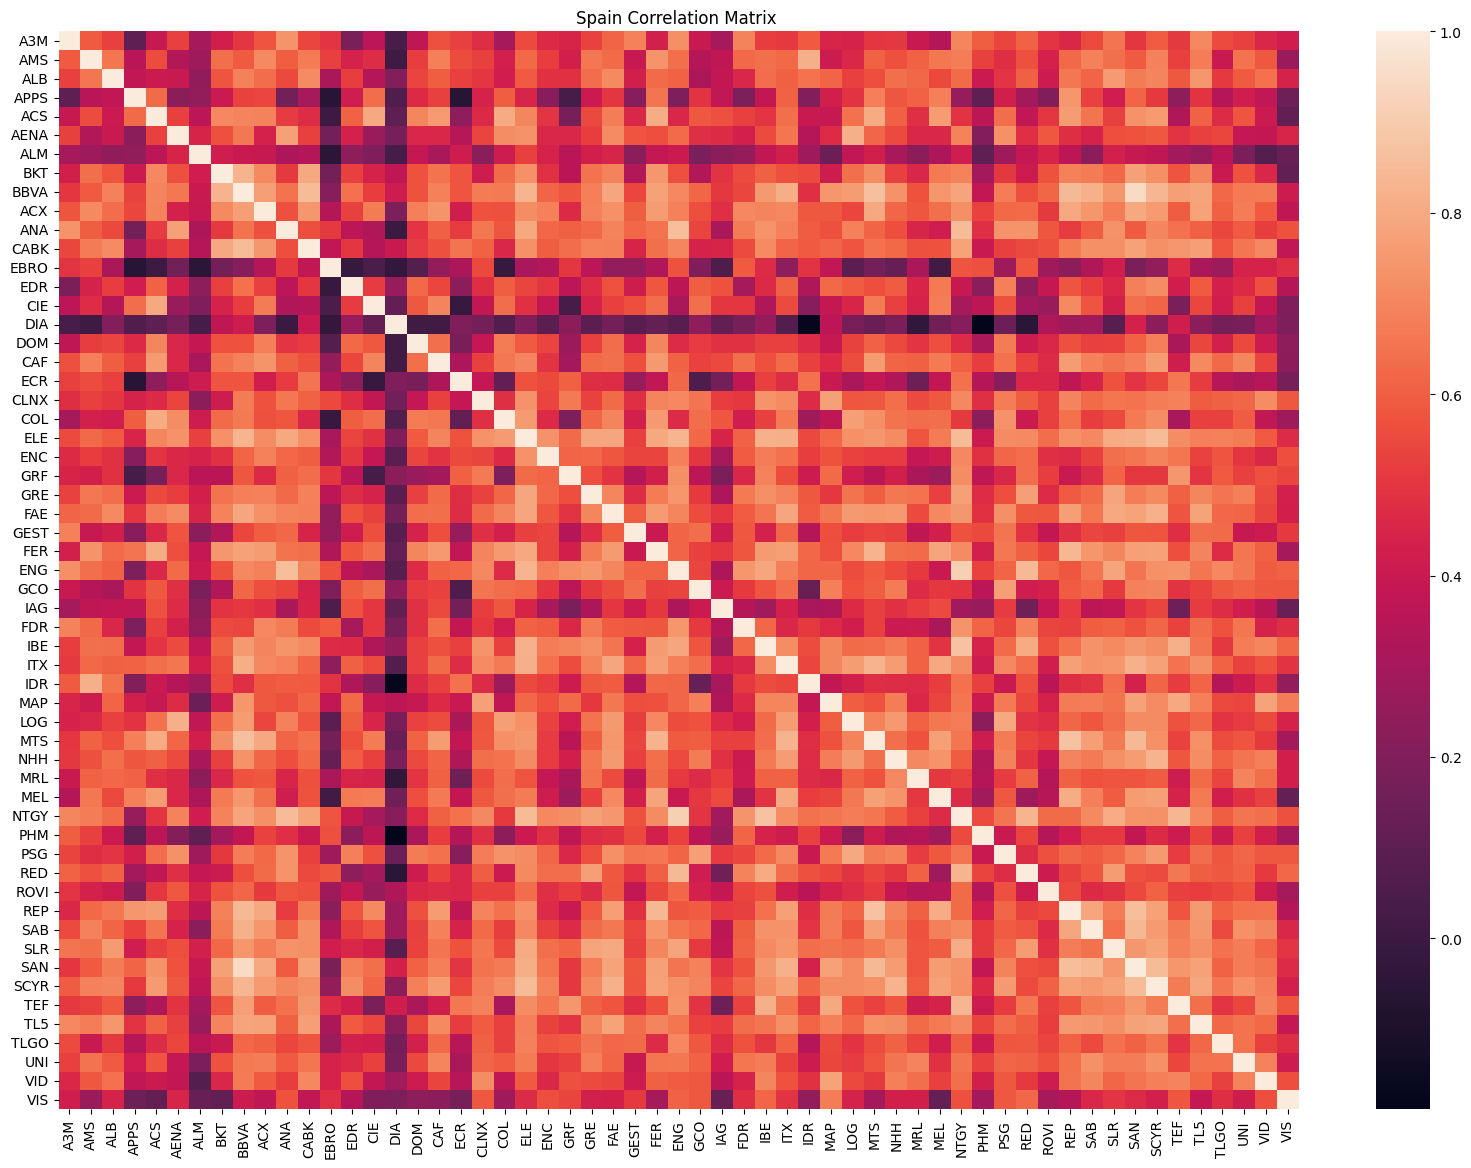

In [29]:
plt.figure(figsize=(20, 14))
sns.heatmap(cor_matrix, annot=False)
plt.title("Spain Correlation Matrix ")
plt.show()

In [30]:
#extracts the indices from the correlation matrix, which are the stocks
corInd_matrix = stocks_spain.iloc[:,1:].corr()
stocks = corInd_matrix.index.values
stocks

array(['A3M', 'AMS', 'ALB', 'APPS', 'ACS', 'AENA', 'ALM', 'BKT', 'BBVA',
       'ACX', 'ANA', 'CABK', 'EBRO', 'EDR', 'CIE', 'DIA', 'DOM', 'CAF',
       'ECR', 'CLNX', 'COL', 'ELE', 'ENC', 'GRF', 'GRE', 'FAE', 'GEST',
       'FER', 'ENG', 'GCO', 'IAG', 'FDR', 'IBE', 'ITX', 'IDR', 'MAP',
       'LOG', 'MTS', 'NHH', 'MRL', 'MEL', 'NTGY', 'PHM', 'PSG', 'RED',
       'ROVI', 'REP', 'SAB', 'SLR', 'SAN', 'SCYR', 'TEF', 'TL5', 'TLGO',
       'UNI', 'VID', 'VIS'], dtype=object)

In [31]:
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(cor_matrix)
print(cor_matrix)

[[1.         0.58861654 0.52360495 ... 0.52556506 0.45796939 0.41970347]
 [0.58861654 1.         0.66101627 ... 0.64860648 0.58315733 0.26724977]
 [0.52360495 0.66101627 1.         ... 0.59040578 0.64528862 0.44176325]
 ...
 [0.52556506 0.64860648 0.59040578 ... 1.         0.69075654 0.41338877]
 [0.45796939 0.58315733 0.64528862 ... 0.69075654 1.         0.56022435]
 [0.41970347 0.26724977 0.44176325 ... 0.41338877 0.56022435 1.        ]]


In [32]:
from networkx.classes.function import edges
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_array(cor_matrix)

#relabels the nodes to match the stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

In [33]:
G.nodes

NodeView(('A3M', 'AMS', 'ALB', 'APPS', 'ACS', 'AENA', 'ALM', 'BKT', 'BBVA', 'ACX', 'ANA', 'CABK', 'EBRO', 'EDR', 'CIE', 'DIA', 'DOM', 'CAF', 'ECR', 'CLNX', 'COL', 'ELE', 'ENC', 'GRF', 'GRE', 'FAE', 'GEST', 'FER', 'ENG', 'GCO', 'IAG', 'FDR', 'IBE', 'ITX', 'IDR', 'MAP', 'LOG', 'MTS', 'NHH', 'MRL', 'MEL', 'NTGY', 'PHM', 'PSG', 'RED', 'ROVI', 'REP', 'SAB', 'SLR', 'SAN', 'SCYR', 'TEF', 'TL5', 'TLGO', 'UNI', 'VID', 'VIS'))

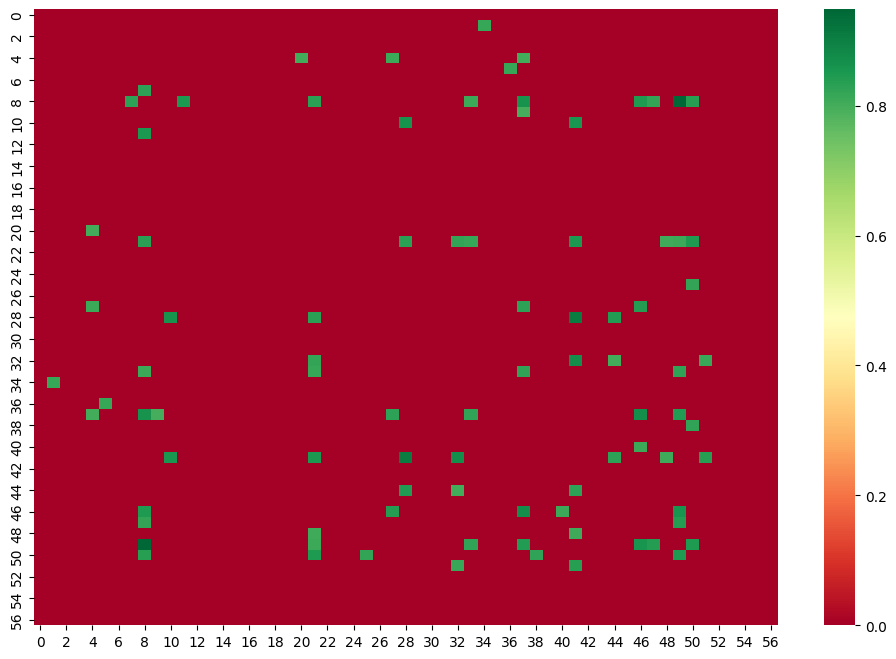

In [34]:
umbral = 0.8

#build new matrix
matrix_new = np.array(cor_matrix)  
#use np.where as filter with the below conditions
positive_corr = np.where(((matrix_new > umbral) & (matrix_new < 1.0)), matrix_new, 0)
negative_corr = np.where(matrix_new < 0, matrix_new, 0)

plt.figure(figsize=(12, 8))
sns.heatmap(positive_corr, annot=False, cmap='RdYlGn')
plt.show()

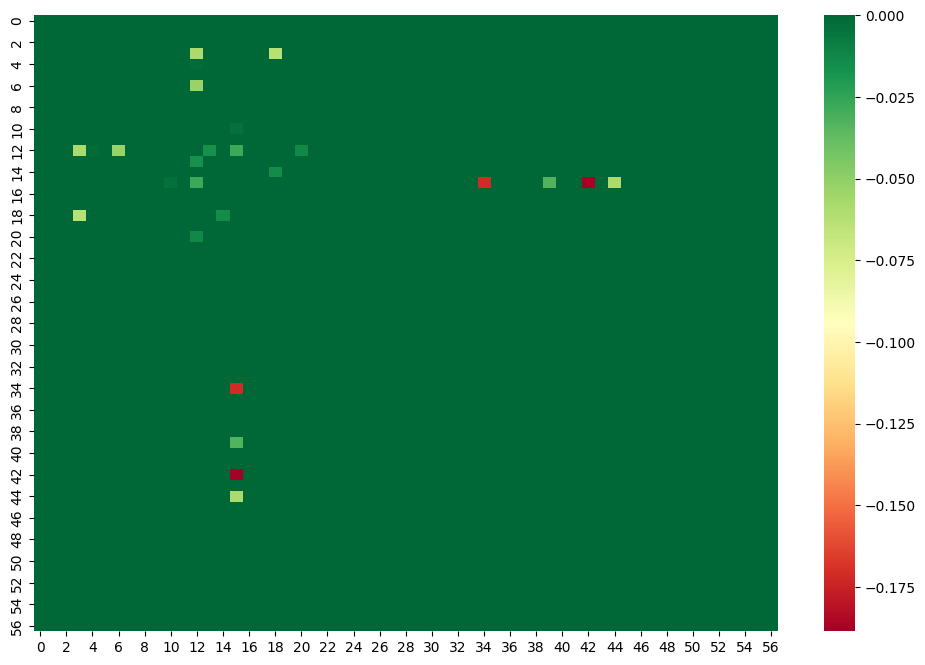

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(negative_corr, annot=False, cmap='RdYlGn')
plt.show()

In [36]:
import math

# vfunc permite obtener la distancia a partir de las correlaciones 

distance = lambda c:  math.sqrt(2*(1-c))
vfunc = np.vectorize(distance)
distances = vfunc(positive_corr)
print(distances)

# Filtramos para representar solo aquellas distancias inferiores a min_distance
max_distance = math.sqrt(2*(1-umbral))
print(f'max_distance = {max_distance}')
positive_dist = np.where((distances < max_distance), distances, 0)
print(positive_dist)

[[1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 ...
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]]
max_distance = 0.6324555320336758
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [37]:
from networkx.classes.function import edges
#Crates graph using the data of the correlation matrix
G_positive = nx.from_numpy_array(positive_dist)

#relabels the nodes to match the  stocks names
G_positive = nx.relabel_nodes(G_positive,lambda x: stocks[x])

In [38]:
G_positive.adj

AdjacencyView({'A3M': {}, 'AMS': {'IDR': {'weight': 0.606219454517326}}, 'ALB': {}, 'APPS': {}, 'ACS': {'COL': {'weight': 0.6317801614933495}, 'FER': {'weight': 0.6195553094083082}, 'MTS': {'weight': 0.6306314154509954}}, 'AENA': {'LOG': {'weight': 0.6052104771231159}}, 'ALM': {}, 'BKT': {'BBVA': {'weight': 0.5877962717093066}}, 'BBVA': {'BKT': {'weight': 0.5877962717093066}, 'CABK': {'weight': 0.5451995455833039}, 'ELE': {'weight': 0.5786791053483087}, 'ITX': {'weight': 0.6152458572747767}, 'MTS': {'weight': 0.5256330415531051}, 'REP': {'weight': 0.5548600726737483}, 'SAB': {'weight': 0.6009096307028282}, 'SAN': {'weight': 0.32175986270549783}, 'SCYR': {'weight': 0.5724313424911216}}, 'ACX': {'MTS': {'weight': 0.6323968637422948}}, 'ANA': {'ENG': {'weight': 0.5296009027656159}, 'NTGY': {'weight': 0.5440492897034921}}, 'CABK': {'BBVA': {'weight': 0.5451995455833039}}, 'EBRO': {}, 'EDR': {}, 'CIE': {}, 'DIA': {}, 'DOM': {}, 'CAF': {}, 'ECR': {}, 'CLNX': {}, 'COL': {'ACS': {'weight': 0.6

In [39]:
# get a list of nodes with no edges
isolates = list(nx.isolates(G_positive))

# remove the isolated nodes from the graph
G_positive.remove_nodes_from(isolates)

In [40]:
# Compute the sum of weights for each node
node_weights = {}
for node in G_positive.nodes():
    node_weights[node] = sum([edge[2]['weight'] for edge in G_positive.edges(node, data=True)])

# Normalize the sum of weights for each node
total_weight = sum(node_weights.values())
for node in node_weights:
    node_weights[node] /= total_weight

# Set the size of each node proportional to its normalized sum of weights
node_sizes = [node_weights[node]*30000 for node in G_positive.nodes()]

# Adjust the layout
pos = nx.kamada_kawai_layout(G_positive)





In [41]:
from pandas.core.arrays.categorical import CategoricalAccessor
# Define the categories of each node
tickers = pd.read_excel(f'{path}data/tickers.xlsx')

# Discard columns that are not necessary
tickers = tickers.loc[:,'Simbolo':'Sector']
tickers['Simbolo'] = tickers['Simbolo'].str.slice(stop=-3)
#print(tickers)

# Create a dictionary where each row represents a key-value pair
ticker_category = dict(zip(tickers['Simbolo'], tickers['Sector']))
print(f'Ticker category: {ticker_category}')

# Get a list of all possible values of the values of the dictionary
node_categories = list(set(ticker_category.values()))
print(f'Node categories: {node_categories}')

# Define a color map for each category
category_colors = {'Petrol and Power': 'red', 'Technology and Telecommunications': 'blue', 'Financial Services':'brown', 'Consumer Goods':'green', 'Consumer Services':'yellow', 'Real Estate Services':'grey', 'Basic Mat., Industry and Construction':'orange'}

# Create a list of colors for each node
node_colors = [category_colors[ticker_category[n]] for n in G_positive.nodes()]


Ticker category: {'A3M': 'Consumer Services', 'ACS': 'Basic Mat., Industry and Construction', 'ACX': 'Basic Mat., Industry and Construction', 'AENA': 'Consumer Services', 'ALB': 'Financial Services', 'ALM': 'Consumer Goods', 'AMS': 'Technology and Telecommunications', 'ANA': 'Basic Mat., Industry and Construction', 'APPS': 'Basic Mat., Industry and Construction', 'BBVA': 'Financial Services', 'BKT': 'Financial Services', 'CABK': 'Financial Services', 'CAF': 'Basic Mat., Industry and Construction', 'CIE': 'Basic Mat., Industry and Construction', 'CLNX': 'Technology and Telecommunications', 'COL': 'Real Estate Services', 'DIA': 'Consumer Services', 'DOM': 'Technology and Telecommunications', 'EBRO': 'Consumer Goods', 'ECR': 'Basic Mat., Industry and Construction', 'EDR': 'Consumer Services', 'ELE': 'Petrol and Power', 'ENC': 'Consumer Goods', 'ENG': 'Petrol and Power', 'FAE': 'Consumer Goods', 'FDR': 'Basic Mat., Industry and Construction', 'FER': 'Basic Mat., Industry and Construction',

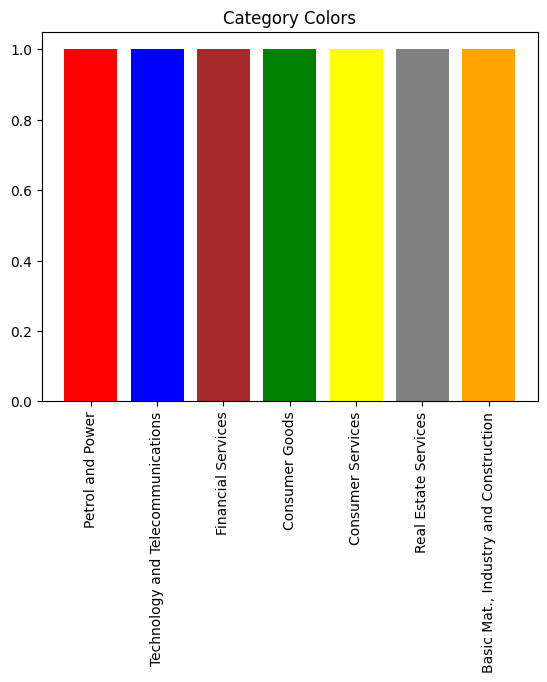

In [42]:
# Create a list of the categories and colors
categories = list(category_colors.keys())
colors = list(category_colors.values())

# Create a bar plot with a rectangle for each color
fig, ax = plt.subplots()
for i in range(len(colors)):
    ax.bar(i, 1, color=colors[i])

# Set the tick labels and title
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=90)
ax.set_title('Category Colors')

# Show the plot
plt.show()

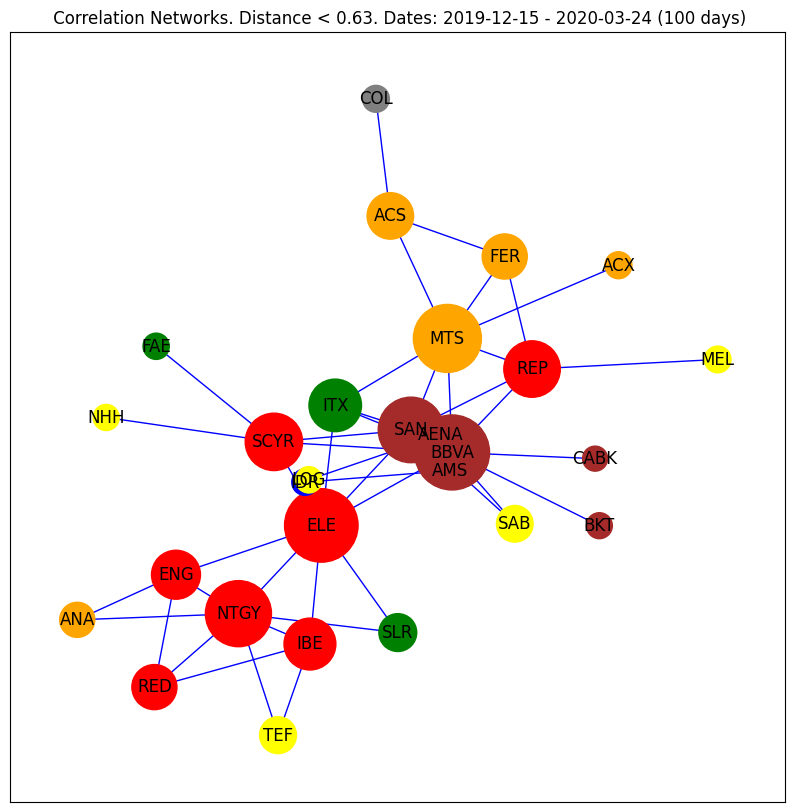

In [43]:
plt.subplots(figsize=(10,10))
nx.draw_networkx_nodes(G_positive, pos, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_edges(G_positive, pos, edge_color = 'blue')
nx.draw_networkx_labels(G_positive, pos)
plt.title(f" Correlation Networks. Distance < {round(max_distance,2)}. Dates: {str(start_date)[:-9]} - {str(finish_date)[:-9]} ({time} days)")
plt.show()

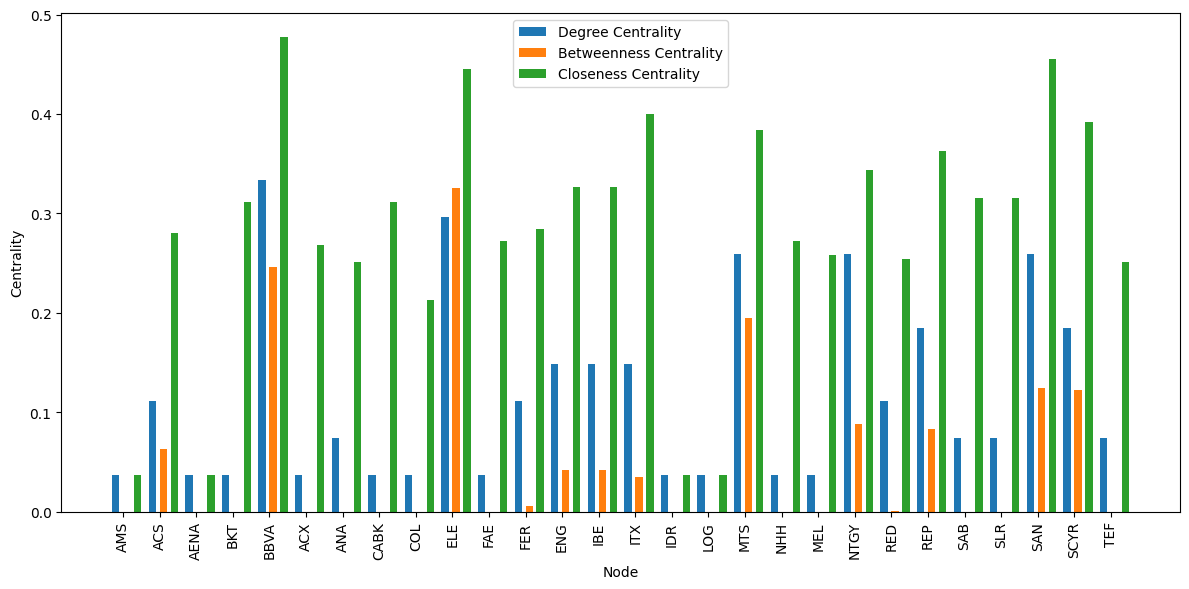

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
#G = nx.karate_club_graph()
G = G_positive

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Prepare the data for plotting
nodes = G.nodes()
degree_values = [degree_centrality[node] for node in nodes]
betweenness_values = [betweenness_centrality[node] for node in nodes]
closeness_values = [closeness_centrality[node] for node in nodes]

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the centrality measures
bar_width = 0.2
bar_space = 0.1
bar_positions = [i for i in range(len(nodes))]

ax.bar(bar_positions, degree_values, width=bar_width, label='Degree Centrality')
ax.bar([p + bar_width + bar_space for p in bar_positions], betweenness_values, width=bar_width, label='Betweenness Centrality')
ax.bar([p + 2 * (bar_width + bar_space) for p in bar_positions], closeness_values, width=bar_width, label='Closeness Centrality')

# Customize the plot
ax.set_xticks([p + bar_width for p in bar_positions])
ax.set_xticklabels(nodes, rotation='vertical')
ax.set_xlabel('Node')
ax.set_ylabel('Centrality')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
